<a href="https://colab.research.google.com/github/Saifullah785/Machine_Learning_Projects/blob/main/Project_23_Medical_Insurance_Prediction_Model/Project_23_Medical_Insurance_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flow Of Project

1 Import Data

2 Proprocess Data

3 Visualize Data

4 Train test split

5 Train Model and Avualivation

6 Prediction System with Web app

Import Necessary Packages


In [ ]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Load the 'insurance.csv' dataset into a pandas DataFrame
medical_df = pd.read_csv('insurance.csv')

In [ ]:
# Display the first 5 rows of the DataFrame to inspect the data
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# About the Data
- age: age of the insured person (numeric)
- sex: gender of the insured person (categorical: male/female)
- bmi: body mass index of the insured person (numeric)
- children: number of children covered by the insurance plan (numeric)
- smoker: whether or not the insured person is a smoker (categorical: yes/no)
- region: region where the insured person resides (categorical: northeast/northwest/southeast/southwest)
- charges: the insurance charges/costs billed to the insured person (numeric)

# Exploring Data & Analysing Data

In [ ]:
# Print the dimensions (number of rows and columns) of the DataFrame
medical_df.shape

(1338, 7)

In [ ]:
# Display a concise summary of the DataFrame, including data types and non-null values
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Generate descriptive statistics of the numerical columns in the DataFrame
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualization

<Figure size 300x300 with 0 Axes>

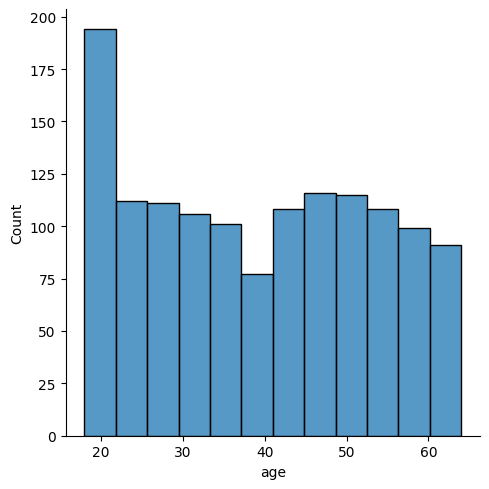

In [ ]:
# Create a distribution plot for the 'age' column to visualize its distribution
plt.figure(figsize=(3,3))
sns.displot(data = medical_df, x='age')

<Figure size 300x300 with 0 Axes>

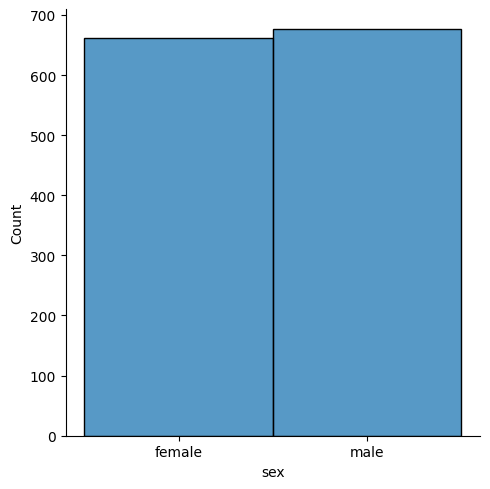

In [ ]:
# Create a distribution plot (histogram) for the 'sex' column
plt.figure(figsize=(3,3))
sns.displot(data = medical_df, x='sex',kind='hist')

In [ ]:
# Count the occurrences of each unique value in the 'sex' column
medical_df['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
# Display a concise summary of the DataFrame again, including data types and non-null values
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 300x300 with 0 Axes>

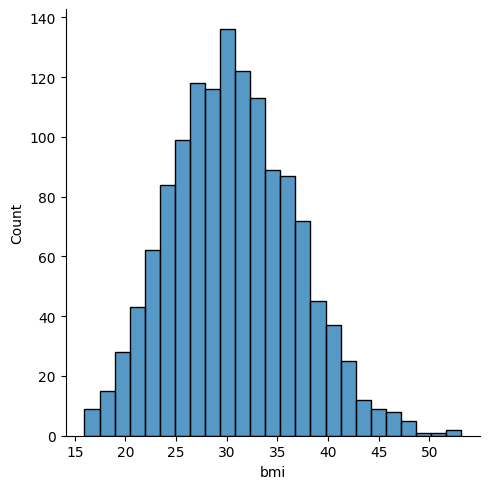

In [ ]:
# Create a distribution plot for the 'bmi' column to visualize its distribution
plt.figure(figsize=(3,3))
sns.displot(data = medical_df, x='bmi')
plt.show()

In [ ]:
# Count the occurrences of each unique value in the 'bmi' column
medical_df['bmi'].value_counts()

,count
bmi,
32.300,13
28.310,9
30.800,8
31.350,8
30.495,8
...,...
39.425,1
40.480,1
38.900,1


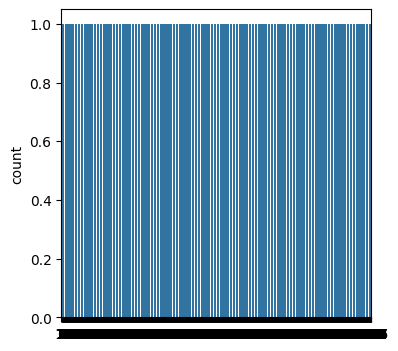

In [ ]:
# Create a count plot for the 'children' column to visualize the distribution of number of children
plt.figure(figsize=(4,4))
sns.countplot(medical_df['children'])
plt.show()

In [ ]:
# Count the occurrences of each unique value in the 'children' column
medical_df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


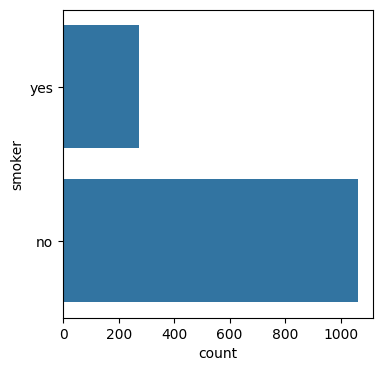

In [ ]:
# Create a count plot for the 'smoker' column to visualize the distribution of smokers/non-smokers
plt.figure(figsize=(4,4))
sns.countplot(medical_df['smoker'])
plt.show()

In [ ]:
# Display the first 5 rows of the DataFrame to inspect the data again
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Convert categorical column to numerical

In [ ]:
# Count the occurrences of each unique value in the 'region' column
medical_df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
# Display the first 5 rows of the DataFrame to inspect the data again
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



# Train Test Split

In [ ]:
# Convert categorical columns ('sex', 'smoker', 'region') into numerical using one-hot encoding
medical_df = pd.get_dummies(medical_df, columns=['sex', 'smoker', 'region'], drop_first=True)
medical_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [ ]:
# Separate the features (X) from the target variable (Y) which is 'charges'
X = medical_df.drop(columns='charges', axis=1)
Y = medical_df['charges']
print("Features (X) and Target (Y) have been redefined.")

Features (X) and Target (Y) have been redefined.


In [ ]:
# Split the data into training and testing sets with a 90/10 ratio and a fixed random state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)
print("Data successfully re-split into training and testing sets.")

Data successfully re-split into training and testing sets.


In [ ]:
# Print the shape of the testing features (X_test) to confirm its dimensions
X_test.shape

(134, 8)

In [ ]:
# Print the shape of the training features (X_train) to confirm its dimensions
X_train.shape

(1204, 8)

In [ ]:
# Initialize a Linear Regression model and train it using the training data
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set using the trained Linear Regression model
y_pred = lr.predict(X_test)

In [ ]:
# Calculate the R-squared score to evaluate the model's performance on the test set
r2_score(Y_test,y_pred)

0.7042518994317892

# Prediction System

In [ ]:
# Prepare an example input for prediction by taking the first row of the test features
input_df = X_test.iloc[0].values # Using the first row of X_test as example input
np_df = np.asarray(input_df)
input_df_reshape = np_df.reshape(1,-1)
prediction = lr.predict(input_df_reshape)
print(prediction)
#

[1927.19665574]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
